<a href="https://colab.research.google.com/github/ayhanardal/digit-recognizer/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library & Data Import

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data/Digit Recognizer/test.csv')
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data/Digit Recognizer/train.csv')
test_df = test.copy()
train_df = train.copy()

In [4]:
data = np.array(train_df)
test_data = np.array(test_df)
m, n = data.shape
np.random.shuffle(data)

test_df = test_df / 255.

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

# Model

In [5]:
def init_params():
  W1 = np.random.rand(10,784) - 0.5
  b1 = np.random.rand(10,1) - 0.5
  W2 = np.random.rand(10,10) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prob(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLU(Z):
  return Z > 0

def back_prob(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2


In [6]:
def get_prediction(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prob(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prob(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 250 == 0:
      print('itrations :', i)
      predictions = get_prediction(A2)
      print('accuracy:', get_accuracy(predictions,Y))

  return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 2000)

itrations : 0
[8 4 9 ... 6 4 6] [5 6 7 ... 0 6 9]
accuracy: 0.09107317073170731
itrations : 250
[5 6 7 ... 0 6 9] [5 6 7 ... 0 6 9]
accuracy: 0.7988048780487805
itrations : 500
[5 6 7 ... 0 6 9] [5 6 7 ... 0 6 9]
accuracy: 0.852609756097561
itrations : 750
[5 6 7 ... 0 6 9] [5 6 7 ... 0 6 9]
accuracy: 0.8718780487804878
itrations : 1000
[5 6 7 ... 0 6 9] [5 6 7 ... 0 6 9]
accuracy: 0.8826341463414634
itrations : 1250
[5 6 7 ... 0 6 9] [5 6 7 ... 0 6 9]
accuracy: 0.8902439024390244
itrations : 1500
[5 6 7 ... 0 6 9] [5 6 7 ... 0 6 9]
accuracy: 0.8961951219512195
itrations : 1750
[5 6 7 ... 0 6 9] [5 6 7 ... 0 6 9]
accuracy: 0.9003658536585366


In [8]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prob(W1, b1, W2, b2, X)
  predictions = get_prediction(A2)
  return predictions

def test_prediction(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print('Prediction:', prediction)
  print('Label:', label)

  current_image = current_image.reshape((28,28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation = 'nearest')
  plt.show()

# Predicts & Results

Prediction: [9]
Label: 9


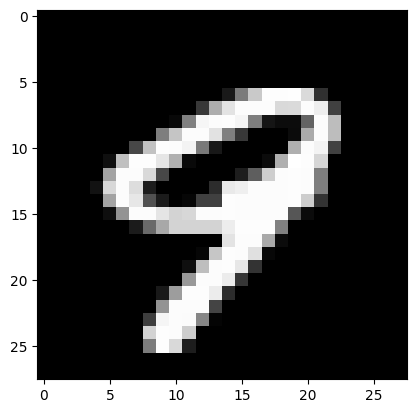

Prediction: [6]
Label: 6


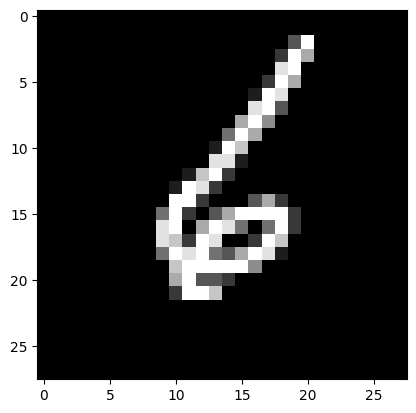

Prediction: [8]
Label: 5


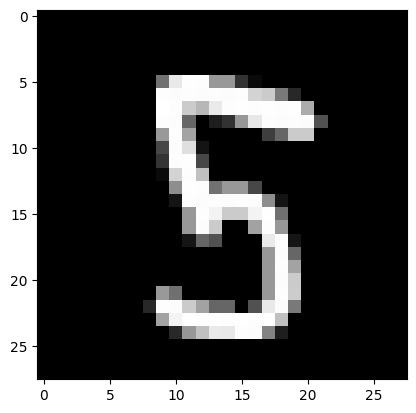

Prediction: [4]
Label: 4


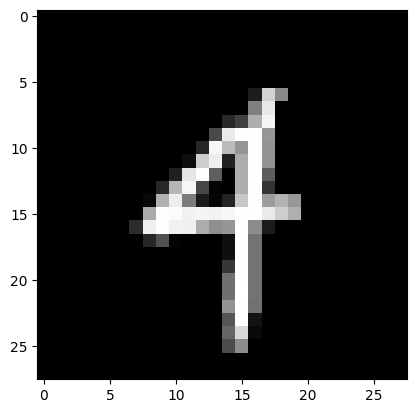

In [9]:
test_prediction(50 ,W1, b1, W2, b2)
test_prediction(3 ,W1, b1, W2, b2)
test_prediction(200 ,W1, b1, W2, b2)
test_prediction(10 ,W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 1 2 1 1 1 9 8 2 3 9 6 5 2 4 4 4 9 3 1 3 7 2 2 3 1 0 8 2 1 3 9 5 9 0 4 5
 2 7 1 4 6 4 5 5 3 2 6 6 8 9 1 2 6 5 2 9 7 6 3 9 0 9 9 3 9 4 9 3 1 7 4 6 6
 5 3 1 1 6 5 9 3 7 5 5 9 2 6 1 1 1 5 5 3 4 8 6 3 6 6 3 0 6 1 4 6 6 1 8 0 0
 3 9 4 4 7 7 2 5 6 1 8 5 6 8 2 9 8 4 0 5 2 6 4 6 9 7 9 4 0 3 1 6 0 4 7 6 1
 2 5 4 1 4 0 6 6 7 1 6 4 4 1 9 3 1 8 4 6 4 9 9 0 0 0 7 7 0 2 6 8 3 7 6 0 6
 9 1 6 1 7 5 9 3 7 4 5 3 3 0 8 6 9 1 9 4 6 3 8 0 1 3 2 3 9 9 5 1 7 8 3 3 8
 3 2 2 7 8 7 8 0 6 6 3 7 4 0 7 0 6 9 4 6 9 5 7 5 7 7 4 4 8 6 5 0 5 7 7 9 1
 9 9 0 7 7 7 7 9 1 8 5 3 9 1 3 9 4 4 8 4 2 7 1 5 9 1 4 1 6 5 9 1 4 8 3 6 7
 1 6 7 8 1 8 1 5 8 6 1 9 6 4 1 2 4 5 2 8 7 2 9 0 5 4 5 5 9 6 9 4 8 2 9 7 6
 4 1 4 1 5 5 6 7 7 4 5 7 3 6 9 4 5 5 2 4 9 6 6 1 7 0 3 3 7 3 0 4 7 0 0 4 7
 8 3 9 1 6 1 7 1 9 1 3 2 7 2 0 9 4 7 6 7 4 0 9 3 4 8 7 7 8 3 3 9 5 9 9 3 3
 1 7 1 2 1 3 9 8 3 3 0 4 6 8 2 2 3 4 7 6 6 2 6 6 3 9 4 0 1 3 6 6 5 9 2 5 6
 2 4 6 1 7 6 8 7 9 1 3 3 5 5 8 2 1 0 2 9 3 7 4 0 2 0 6 1 7 0 1 7 9 6 8 0 5
 4 7 3 7 1 1 3 3 4 1 8 3 

0.912

# Publish to Kaggle

In [ ]:
test_predictions = make_predictions(test_data.T, W1, b1, W2, b2)

In [12]:
img_id = []
for i in range(len(test_data)):
  img_id.append(i+1)

submission = pd.DataFrame([img_id,test_predictions]).T
submission.columns = ['ImageId','Label']

In [13]:
submission.to_csv('kaggle_submission.csv', index = False)